In [1]:
import networkx as nx
import json
import sqlite3
from tqdm import tqdm
import matplotlib.pyplot as plt
import struct
import graph_force

MAPPING_JSON = f"graph_mapping.json"

## Create Graph file

In [ ]:

# DB
con = sqlite3.connect("mastodon.db")
cur = con.cursor()

mapping = {}
i = 0
with open("graph.bin", "wb") as f:
    n = cur.execute("SELECT count(distinct(id)) FROM instances WHERE not instance like '%glaceon.social'").fetchone()[0]
    for x in cur.execute("SELECT distinct(id) FROM instances WHERE not instance like '%glaceon.social'"):
        mapping[x[0]] = i
        i += 1
    print(n)
    f.write(struct.pack("i", n))
    for x in tqdm(cur.execute("""
        SELECT DISTINCT min(source, target), max(source, target)
        FROM edges
        JOIN instances i1 on i1.id = edges.source
        JOIN instances i2 on i2.id = edges.target
        where not i1.instance like '%glaceon.social'
        and not i2.instance like '%glaceon.social'
    """)):
        if x[0] not in mapping or x[1] not in mapping:
            continue
        f.write(struct.pack("iif", mapping[x[0]], mapping[x[1]], 1))
json.dump(mapping, open(MAPPING_JSON, "w"))


## Read Graph file

In [2]:
mapping = json.load(open(MAPPING_JSON, "r"))

In [3]:
pos = graph_force.layout_from_edge_file("graph.bin", iter=20000, model="networkx_model")

In [4]:
json.dump(pos, open("positions_20000.json", "w"))

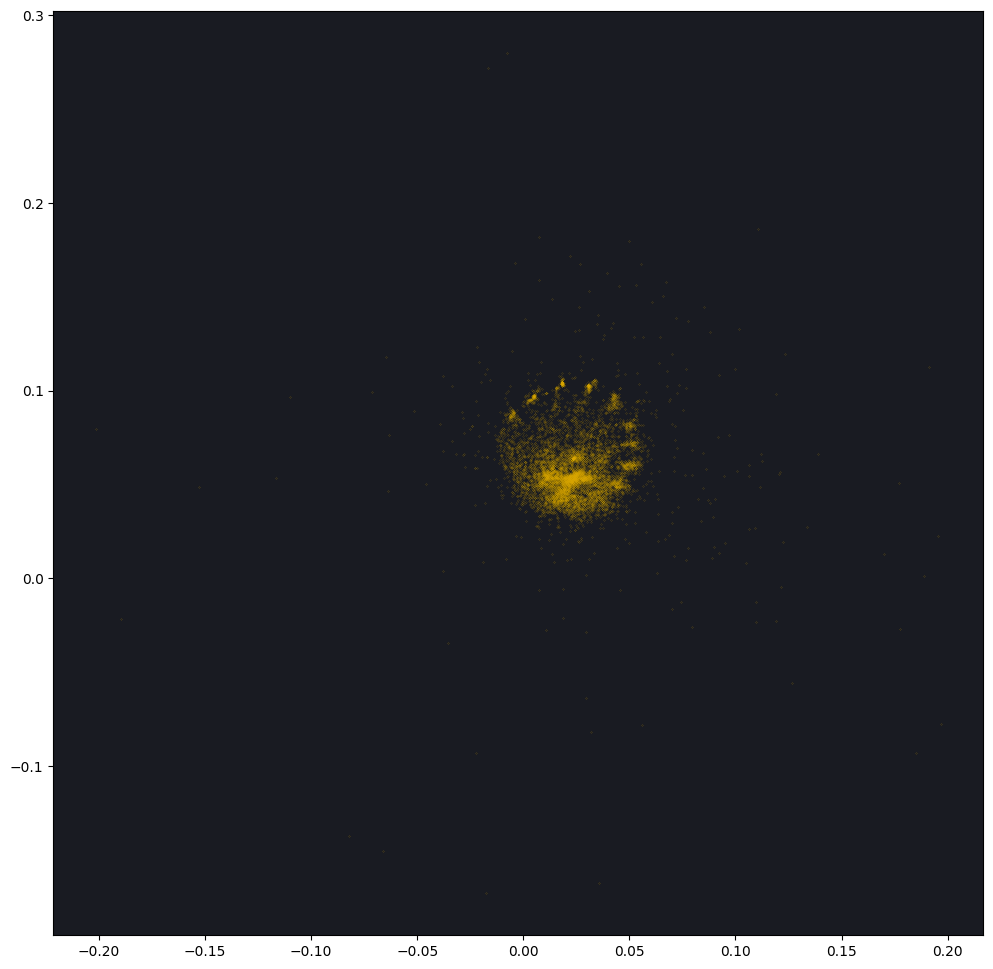

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(*zip(*pos), s=0.01, c="#ddaa00")
ax.set_facecolor('#191b22')
#plt.axis('off')
#plt.tight_layout()
#plt.xlim(0.05, 0.15)
#plt.ylim(-0.1, 0.01)

In [ ]:
import networkx as nx
import json
import sqlite3
from tqdm import tqdm
import matplotlib.pyplot as plt
import struct
import graph_force

# DB
con = sqlite3.connect("mastodon.db")
cur = con.cursor()

mapping = {}
edges = []
i = 0
n = cur.execute("SELECT count(distinct(id)) FROM instances").fetchone()[0]
for x in cur.execute("SELECT distinct(id) FROM instances"):
    mapping[x[0]] = i
    i += 1
print(n, len(mapping))
pos = graph_force.layout_from_edge_list(n, (
        (mapping[x[0]], mapping[x[1]])
        for x in cur.execute("SELECT DISTINCT min(source, target), max(source, target) FROM edges")
    )
)

24007 24007


In [2]:
# spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

KeyboardInterrupt: 

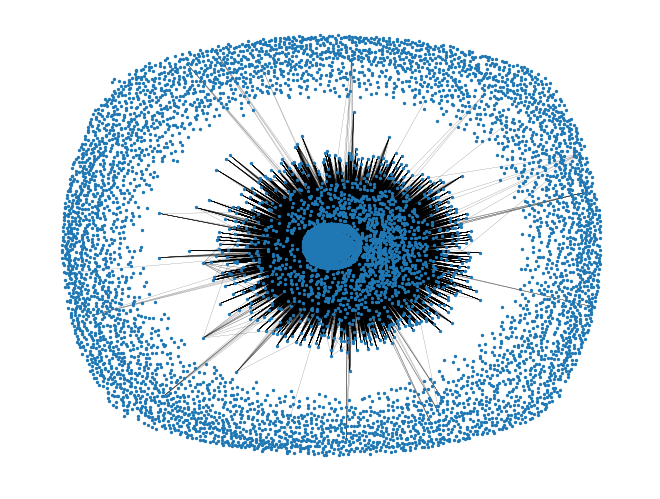

In [3]:
nx.draw(G, pos=pos, node_size=2, width=0.1)
plt.show()